In [1]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import joblib
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import cross_val_score,KFold

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet,LinearRegression,SGDRegressor,LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading train data from csv file
df_train= pd.read_excel('rest_Data_Train.xlsx')

# reading test data from csv file
df_test= pd.read_excel('rest_Data_Test.xlsx')

# sample of train data
print('\x1b[1;31m'+'Train data sample'+'\x1b[0m')
df_train.head(3)

Train data sample


,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800


In [3]:
# sample of test data
print('\x1b[1;31m'+'Test data sample'+'\x1b[0m')
df_test.head(3)

Test data sample


,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes


###### Performing EDA and data preprocessing

In [4]:
# checking shape of train and test data
print('\x1b[1;31m'+'Train data shape'+'\x1b[0m',df_train.shape)
print('\x1b[1;31m'+'Test data shape'+'\x1b[0m',df_test.shape)

Train data shape (12690, 9)
Test data shape (4231, 8)


In [5]:
# checking data type of train and test data
print('\x1b[1;31m'+'Data type of train data set\n\n'+'\x1b[0m',df_train.dtypes,'\n\n')
print('\x1b[1;31m'+'Data type of test data set\n'+'\x1b[0m',df_test.dtypes)

Data type of train data set

 TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object 


Data type of test data set
 TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
dtype: object


In [6]:
#checking unique values in train and test data
print('\x1b[1;31m'+'Unique value in train data set\n\n'+'\x1b[0m',df_train.nunique(),'\n\n')
print('\x1b[1;31m'+'Unique value in test data set\n'+'\x1b[0m',df_test.nunique())

Unique value in train data set

 TITLE              113
RESTAURANT_ID    11892
CUISINES          4155
TIME              2689
CITY               359
LOCALITY          1416
RATING              32
VOTES             1847
COST                86
dtype: int64 


Unique value in test data set
 TITLE              86
RESTAURANT_ID    4127
CUISINES         1727
TIME             1183
CITY              151
LOCALITY          834
RATING             31
VOTES            1136
dtype: int64


In [7]:
# checking null value in train and test data
print('\x1b[1;31m'+'Null value in train data set\n\n'+'\x1b[0m',df_train.isnull().sum(),'\n\n')
print('\x1b[1;31m'+'Null value in test data set\n'+'\x1b[0m',df_test.isnull().sum())

Null value in train data set

 TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64 


Null value in test data set
 TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64


Heat map of null value in test data set



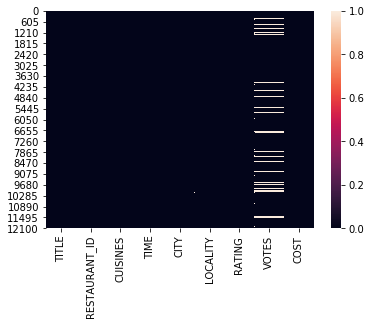

In [8]:
print('\x1b[1;31m'+'Heat map of null value in test data set\n'+'\x1b[0m')
sns.heatmap(df_train.isnull())

Heat map of null value in test data set



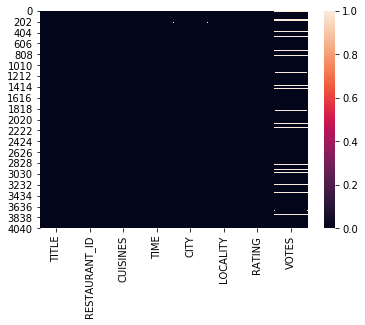

In [9]:
print('\x1b[1;31m'+'Heat map of null value in test data set\n'+'\x1b[0m')
sns.heatmap(df_test.isnull())

In [10]:
#taking care of null value
df_train['CITY'].fillna('Others', inplace=True)  
df_train['LOCALITY'].fillna('Others', inplace=True)  
df_train['RATING'].fillna(df_train['RATING'].mode()[0], inplace=True)  
df_train['VOTES'].fillna('0', inplace=True)

df_test['CITY'].fillna('Others', inplace=True)  
df_test['LOCALITY'].fillna('Others', inplace=True)  
df_test['RATING'].fillna(df_test['RATING'].mode()[0], inplace=True)  
df_test['VOTES'].fillna('0', inplace=True)

In [11]:
#converting votes into float
df_train['VOTES'] = df_train['VOTES'].str.replace(' votes', '').astype(float)
df_test['VOTES'] = df_test['VOTES'].str.replace(' votes', '').astype(float)

In [12]:
#converting rating into float
df_train['RATING'] = df_train['RATING'].replace({'-':0.0, 'NEW':5.0})
df_test['RATING'] = df_test['RATING'].replace({'-':0.0, 'NEW':5.0})

df_train['RATING'] = df_train['RATING'].astype(float)
df_test['RATING'] = df_test['RATING'].astype(float)

In [13]:
# dropping RESTAURANT_ID column since it is almost unique for each restaurant
df_train.drop(['RESTAURANT_ID'], axis=1, inplace=True)
df_test.drop(['RESTAURANT_ID'], axis=1, inplace=True)

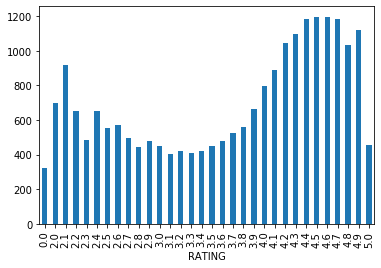

In [14]:
#barplot of average cost grouped by rating
df_train.groupby(['RATING'])['COST'].mean().plot(kind='bar')

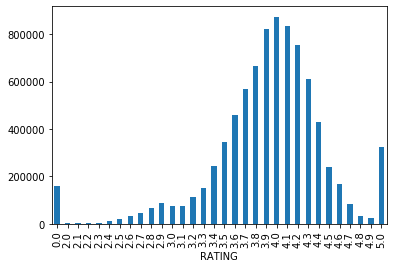

In [15]:
#barplot of total cost grouped by rating
df_train.groupby(['RATING'])['COST'].sum().plot(kind='bar')

In [16]:
#description of data
df_train.describe()

,RATING,VOTES,COST
count,12690.000000,12690.000000,12690.000000
mean,3.705477,376.231127,655.252246
std,0.892218,810.946942,627.003540
min,0.000000,0.000000,20.000000
25%,3.500000,39.250000,300.000000
50%,3.800000,132.000000,500.000000
75%,4.100000,405.000000,800.000000
max,5.000000,41186.000000,14000.000000


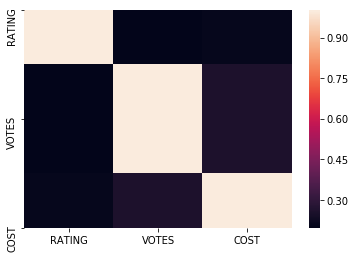

In [17]:
# heat map of corelation
sns.heatmap(df_train.corr())

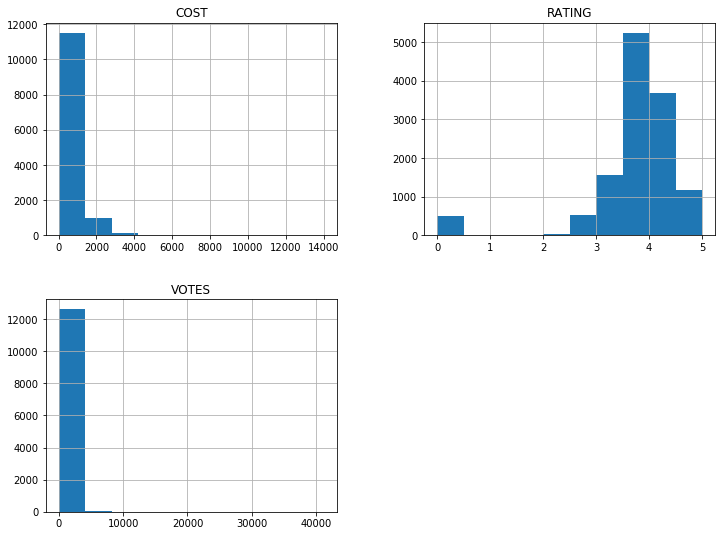

In [18]:
#histogram to check the data despersion

df_train.hist(figsize=(12,9))
plt.show()

RATING       AxesSubplot(0.125,0.772143;0.227941x0.107857)
VOTES     AxesSubplot(0.398529,0.772143;0.227941x0.107857)
COST      AxesSubplot(0.672059,0.772143;0.227941x0.107857)
dtype: object

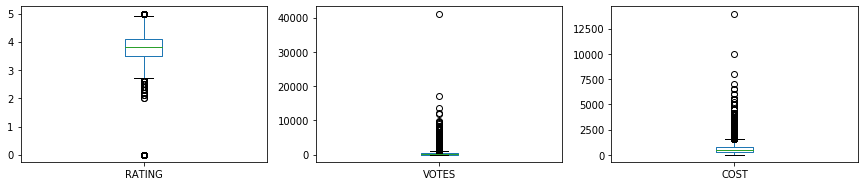

In [19]:
# Creating boxplot of continous variables to visualize the minimum, maximum, avareg value for each colums along with outlires
df_train.plot(kind='box',subplots=True,layout=(6,3),figsize=(15,20))

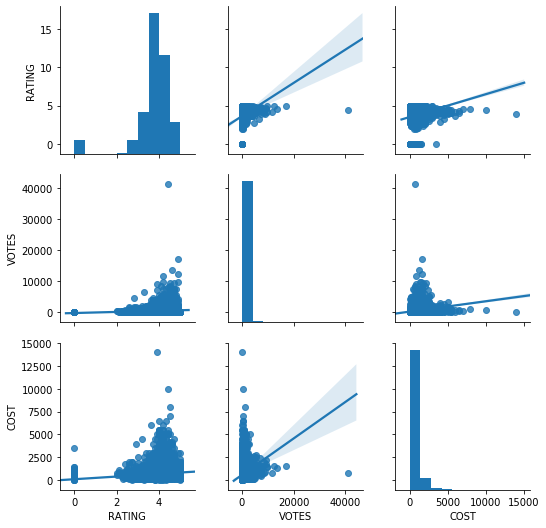

In [20]:
#check the price and travel hour pair plot
sns.pairplot(data=df_train,kind='reg')

###### Manipulating data before bulding the model

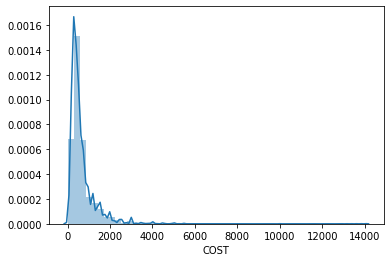

In [21]:
# visualizing skewness in cost
sns.distplot(df_train['COST'])
plt.show()

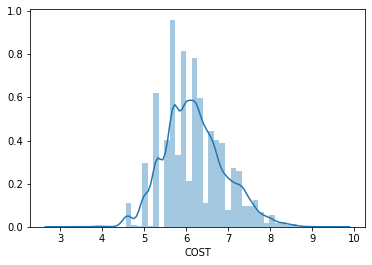

In [22]:
# using log transformation for removing skewness in cost
target = np.log(df_train.COST)
sns.distplot(target)
plt.show()

In [23]:
#masking of object column
categorial_mask1=df_train.dtypes==object
categorial_mask2=df_test.dtypes==object

#categorical columns
categorical_cols1=df_train.columns[categorial_mask1].tolist()
categorical_cols2=df_test.columns[categorial_mask2].tolist()

le=LabelEncoder()

df_train[categorical_cols1]=df_train[categorical_cols1].apply(lambda col:le.fit_transform(col))
df_test[categorical_cols2]=df_test[categorical_cols2].apply(lambda col:le.fit_transform(col))

df_train.head(3)

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,31,2627,739,321,285,3.6,49.0,1200
1,33,289,1885,67,1047,4.2,30.0,1500
2,31,2976,661,67,1102,3.8,221.0,800


In [24]:
df_test.head(3)

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,23,1293,503,110,663,4.3,564.0
1,75,1632,933,96,221,4.2,61.0
2,23,1455,219,96,411,3.8,350.0


In [25]:
#removing outlires 
count=df_train[['COST']]
z=abs(zscore(count))
print(df_train.shape)
df_train=df_train.loc[(z<3).all(axis=1)]
print(df_train.shape)

(12690, 8)
(12466, 8)


In [26]:
# dividing dataset into input values 'x' and output value 'y'
x = df_train.drop(columns=['COST'])
print('x dataset\n',x.head(),'\n')
y=df_train['COST']
print('y datase\n',y.sample(3))
print(x.shape)
print(y.shape)

x dataset
    TITLE  CUISINES  TIME  CITY  LOCALITY  RATING  VOTES
0     31      2627   739   321       285     3.6   49.0
1     33       289  1885    67      1047     4.2   30.0
2     31      2976   661    67      1102     3.8  221.0
3     95      4130   275   222       136     4.1   24.0
4     50      1766   615   222       620     3.8  165.0 

y datase
 5406     300
2789     200
885     1800
Name: COST, dtype: int64
(12466, 7)
(12466,)


In [27]:
# standardizes the data in x using standerd scaler technique
scale=StandardScaler()
x=scale.fit_transform(x)

###### Bulding and comparing multipe regression model, to find out the best model

In [28]:
#creating models array with all the model
Models=[('Ridge',Ridge()),('GradientBoostingRegressor',GradientBoostingRegressor(random_state=5)),('ElasticNet',ElasticNet()),
        ('Lasso',Lasso(random_state=29)),('SGDRegressor',SGDRegressor()),('DecisionTreeRegressor',DecisionTreeRegressor(random_state=5)),
        ('KNeighborsRegressor',KNeighborsRegressor()),('RandomForestRegressor',RandomForestRegressor(random_state=5)),
        ('LinearRegression',LinearRegression()),('SVR',SVR())]

In [29]:
# loop to find out the maximum r2score for all the model in models array, along a range of random state
Model_array=[]
Random_state=[]
Max_r2score_array=[]
for name,model in Models:
    max_r2score=0    
    for random_state in range(10,99):
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.2,random_state=random_state,shuffle=True)
        model.fit(train_x,train_y)
        pred=model.predict(test_x)
        
        r2score=r2_score(test_y,pred)
        
        if r2score>max_r2score:
            max_r2score=r2score
            best_random_state=random_state
    
    Model_array.append(name)
    Random_state.append(best_random_state)
    Max_r2score_array.append(max_r2score)

In [30]:
# comparing the performances of all the model on R2 score basis
model_accuracy_performance = pd.DataFrame({'Model': Model_array,'R2 score': Max_r2score_array,'Random state': Random_state})
model_accuracy_performance.sort_values(by='R2 score', ascending=False)

,Model,R2 score,Random state
1,GradientBoostingRegressor,0.723256,62
7,RandomForestRegressor,0.713135,10
5,DecisionTreeRegressor,0.500838,33
6,KNeighborsRegressor,0.473127,10
8,LinearRegression,0.279965,59
0,Ridge,0.279961,59
3,Lasso,0.279763,59
4,SGDRegressor,0.278135,98
2,ElasticNet,0.243194,59
9,SVR,0.177318,40


###### Conclusion
On basis of r2 score GradientBoostingRegressor model is performing the best with maximum r2 score

In [31]:
# loop to find out the cross_val_score for r2 of all the model in models array
Cross_val_score_array=[]
Standard_Deviation=[]
for name, model in Models:
    kf=KFold(n_splits=10,random_state=5)
    cscore=cross_val_score(model,x,y,cv=kf,scoring='r2')
    
    Cross_val_score_array.append(cscore.mean())
    Standard_Deviation.append(cscore.std())

In [32]:
# comparing the performances of all the model on crossval basis
model_cross_val_performance = pd.DataFrame({'Model': Model_array,'Cross val Acuracy': Cross_val_score_array,
                                            'Standard Deviation': Standard_Deviation})
model_cross_val_performance.sort_values(by='Cross val Acuracy', ascending=False)

,Model,Cross val Acuracy,Standard Deviation
1,GradientBoostingRegressor,0.669846,0.022269
7,RandomForestRegressor,0.665651,0.026184
6,KNeighborsRegressor,0.425330,0.030804
5,DecisionTreeRegressor,0.416554,0.047983
3,Lasso,0.232580,0.063798
0,Ridge,0.232305,0.064667
8,LinearRegression,0.232302,0.064681
4,SGDRegressor,0.228377,0.065179
2,ElasticNet,0.217007,0.026270
9,SVR,0.165038,0.017655


###### Conclusion
On basis of Cross val Acuracy GradientBoostingRegressor model is performing best with maximum cross val score

###### On basis of our compression of r2 , Mean squared error and Cross val score i choose GradientBoostingRegressor model since it performing best on given data

In [33]:
#using grid search to improve result for GradientBoostingRegressor model
kfoldr =KFold(n_splits=10,random_state=69)
param_grid={'max_depth':[3,4,5],'max_features':['auto','sqrt'],'min_samples_split':[2,3,4],'n_estimators':[200,300,400],
            'min_samples_leaf':[1,2,3]}
mod=GradientBoostingRegressor()
grid=GridSearchCV(estimator=mod,param_grid=param_grid,scoring='r2',cv=kfoldr,n_jobs=3)
grid_result=grid.fit(x,y)

In [34]:
grid_result.best_score_

0.7377228047534639

In [35]:
grid_result.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [36]:
grid_result.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features='auto', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

### Using test data and predecting price for test data...

In [37]:
X_train = df_train.drop(labels='COST', axis=1)
y_train = df_train['COST'].values

X_test = df_test

In [38]:
# standardizes the data in x using standerd scaler technique
X_train=scale.fit_transform(X_train)
X_test=scale.fit_transform(X_test)

In [39]:
#checking shape of train and test data
X_train.shape,y_train.shape,X_test.shape

((12466, 7), (12466,), (4231, 7))

In [40]:
# using best performing model for predecting the price
gbr = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features='auto', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

gbr.fit(X_train,y_train)

Y_pred = gbr.predict(X_test)


In [41]:
# saving the predection to a csv file.
prediction = pd.DataFrame(Y_pred, columns=['Y_pred']).to_csv('Project 19 Predicting Restaurant Food Cost.csv')

In [42]:
# saving the model using pickle.
joblib.dump(gbr,'gbr_Project 19 Predicting Restaurant Food Cost.pkl')

['gbr_Project 19 Predicting Restaurant Food Cost.pkl']